## $\color{red}{\text{Lecture Overview}}$
1. **Data visualization**
2. **Univariate charts for categorical data**
3. **Univariate charts for numeric data**

## $\color{red}{\text{Data Visualization}}$
1. **Data visualization** is the use of charts to form a basic understanding of data
2. It is an effective part of any data analysis
3. Often, the data type will dictate which chart to use
    - Example: Numeric, Categorical, etc.

## $\color{red}{\text{Categories of Data Visualization}}$
### $\color{blue}{\text{Univariate and Multivariate Charts}}$

1. **Univariate charts**
    - Displays the behavior of a single variable
2. **Multivariate charts**
    - Displays the relationship between two or more variables

## $\color{red}{\text{Import Required Packages}}$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

## $\color{red}{\text{Import Data}}$

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/DS4510/Data
hr_df= pd.read_excel('hrData.xlsx', sheet_name='origData')

/content/drive/MyDrive/DS4510/Data


## $\color{red}{\text{Multivariate Charts For Categorical Data}}$
### $\color{blue}{\text{Displaying Counts With CrossTabs}}$

1. For categorical data, there are limited options for visualization
2. Counts and percentages to display values in categories

### $\color{green}{\text{Example 1}}$

1. Provide a cross tabulation of the following:
    - **Attrition** by **Gender**
    - **Attrition** by **EducationField**
    - **Attrition** by **MaritalStatus**
2. Comment on it

In [12]:
#hr_df.head()

#Get attrition by gender #Normalize can be index or columns #Index is row percentage and columns is column percentage
table1 = pd.crosstab(index=hr_df['Attrition'], columns=hr_df['Gender'], normalize='index')

table2 = pd.crosstab(index=hr_df['Attrition'], columns=hr_df['EducationField'], normalize='index')
#table2

table3 = pd.crosstab(index=hr_df['Attrition'], columns=hr_df['MaritalStatus'], normalize='index')
table3

MaritalStatus,Divorced,Married,Single
Attrition,,,
No,0.238443,0.477697,0.283861
Yes,0.139241,0.354430,0.506329


## $\color{red}{\text{Multivariate Charts For Numeric Data}}$
### $\color{blue}{\text{Displaying Relationships With Scatterplots}}$

1. Scatterplots shows the relationship between two numeric variables
2. It serves as the basis for correlation analysis

### $\color{green}{\text{Example 2}}$
1. Provide a scatterplot of the following: **Age** and **DistanceFromHome**
2. Comment on it

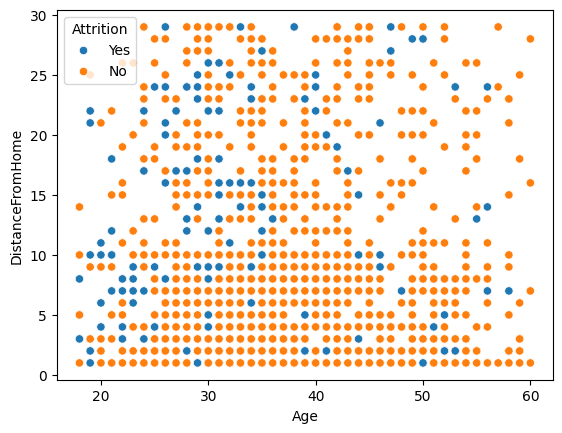

In [14]:
#Scatterplot of age and distance from home
sns.scatterplot(data=hr_df, x='Age', y="DistanceFromHome", hue="Attrition")
plt.show()

### $\color{blue}{\text{Displaying Relationships with a Scatterplot Matrix}}$
1. Displays a matrix of scatterplots
2. Allows to analyse multiple relationships

### $\color{green}{\text{Example 3}}$
1. Provide a scatterplot matrix of the following: **Age**, **TotalWorkingYears**, and **TrainingTimesLastYear**
2. Comment on it

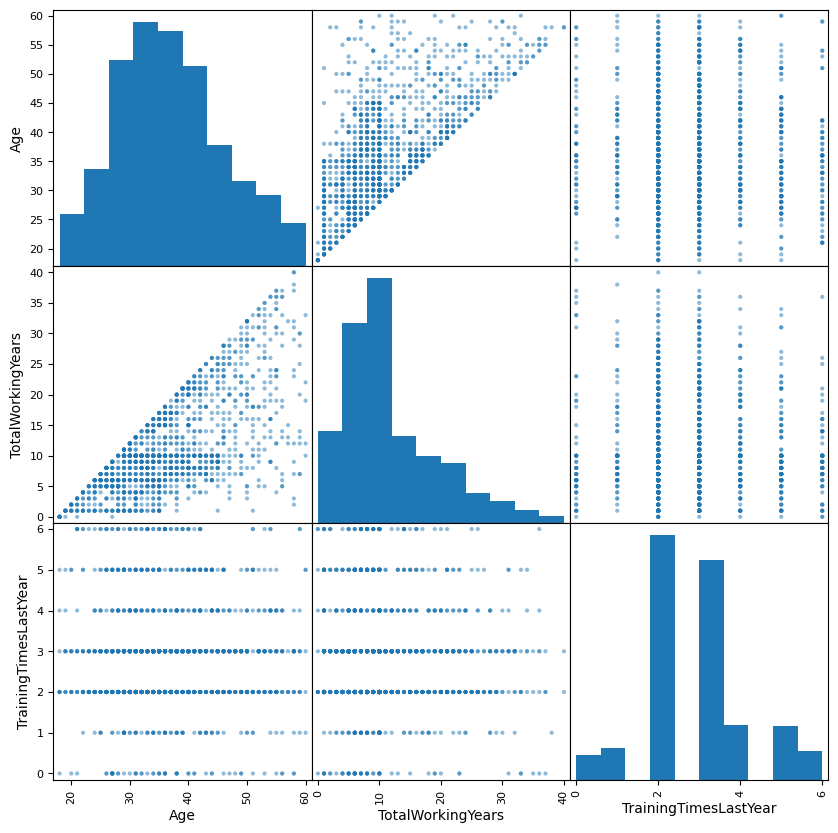

In [16]:
variables = ["Age", "TotalWorkingYears" , "TrainingTimesLastYear"]

# Get data for variables only
scat_data = hr_df[variables]

#Plotting
pd.plotting.scatter_matrix(scat_data, figsize=(10,10), diagonal='hist')
plt.show()

### $\color{blue}{\text{Displaying Correlations With a HeatMap}}$
1. Correlation heatmap shows the correlation between numeric variables
2. Darker colors signify high correlation and vice versa

### $\color{green}{\text{Example 4}}$
1. Provide a correlation heatmap for variables in the data
2. Comment on it
    - Which variables are highly correlated?
    - Which variables are not highly correlated?

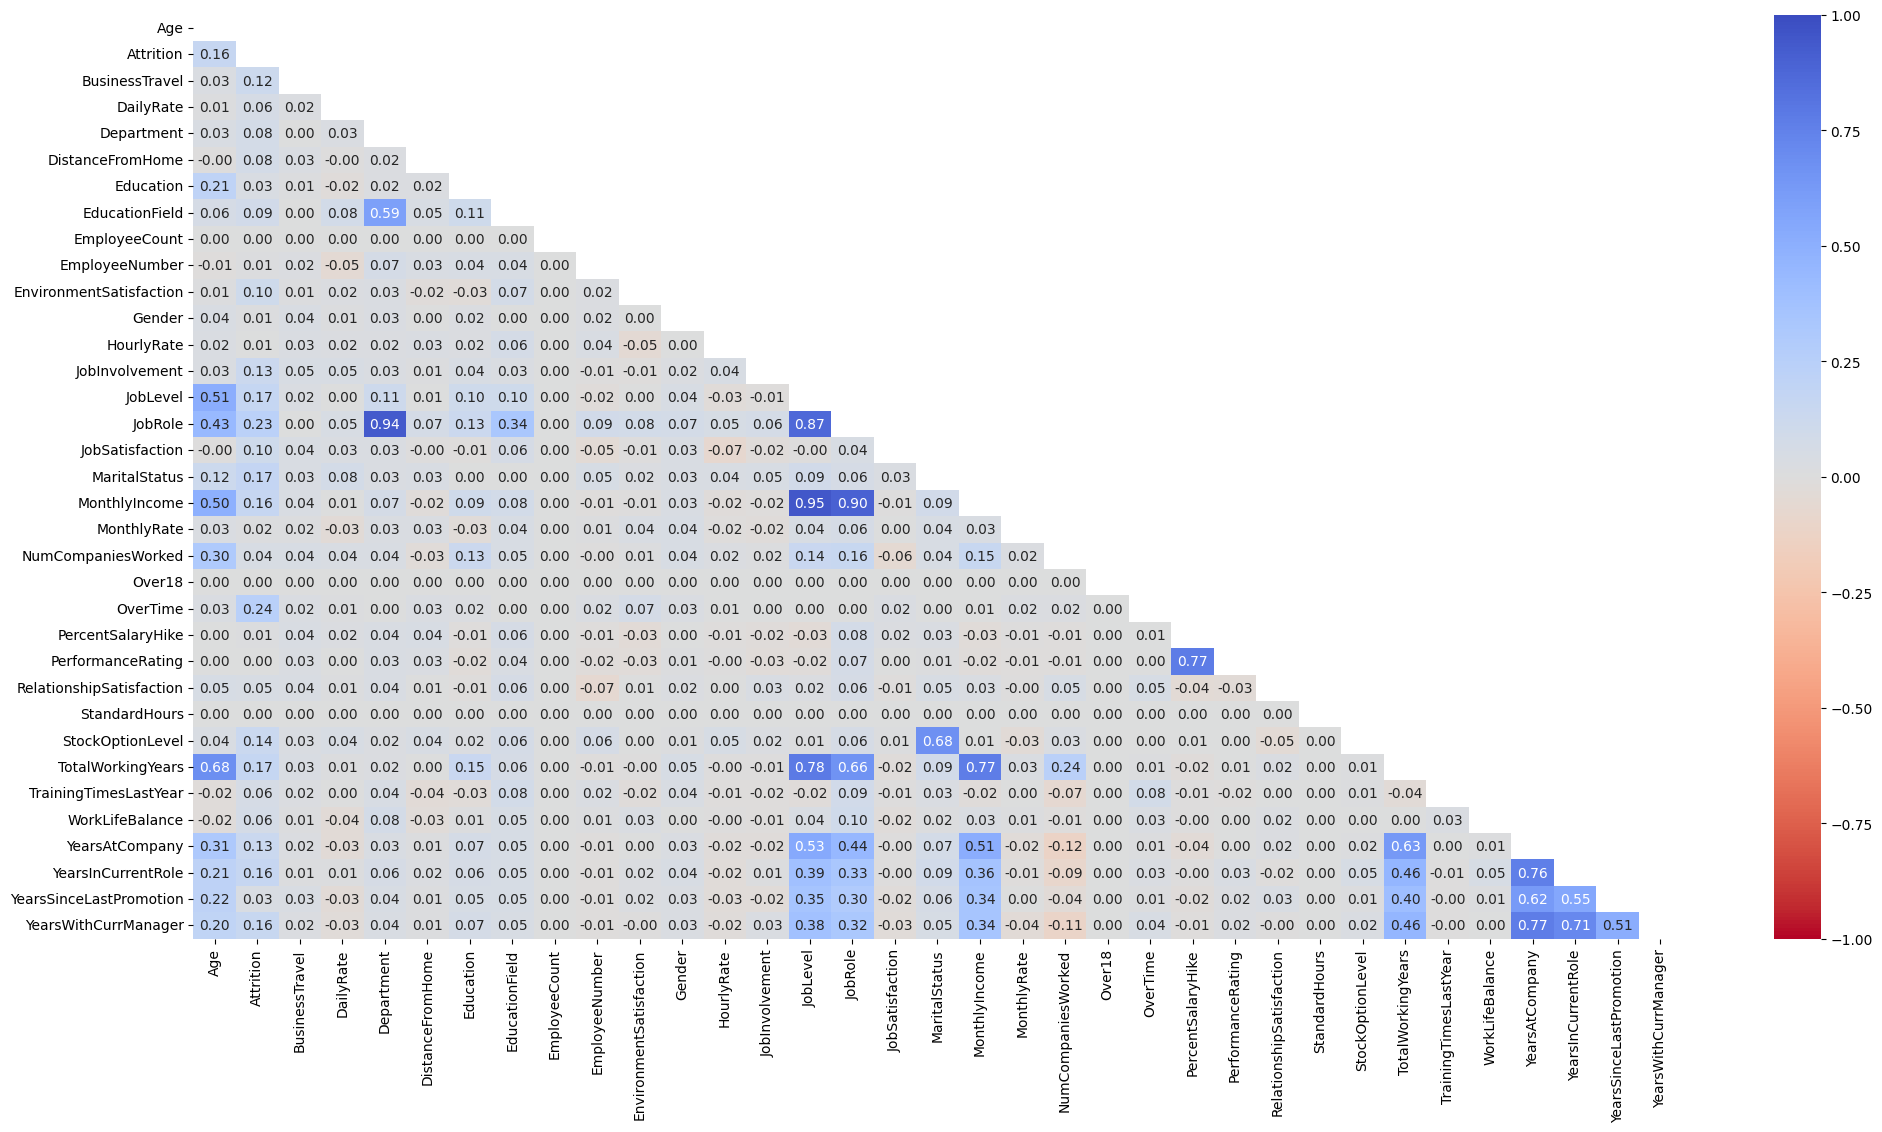

In [25]:
#!pip install dython
from dython.nominal import associations

#Use the function to compute correlation matrix
corr_matrix = associations(hr_df, compute_only=True)['corr']
corr_matrix

#Retrieve only the upper diaognal of matrix
mask_diag = np.triu(np.ones_like(corr_matrix, dtype=bool))

#Plotting the correlation, masking the upper triangle
plt.figure(figsize=(24,12))
sns.heatmap(corr_matrix, annot=True, mask=mask_diag, cmap="coolwarm_r", fmt=".2f", vmin=-1,vmax=1 )
plt.show()

## $\color{red}{\text{Multivariate Charts Between Numeric and Categorical Data}}$
### $\color{blue}{\text{Displaying Relationships With Bar Graphs}}$

1. Shows relationship between a numeric variable per category
    - Example: Average age per gender, minimum wage per department, etc

### $\color{green}{\text{Example 5}}$
1. Provide bar graphs for the following scenarios and **comment on it**
    - Average **NumCompaniesWorked** per **Department**
    - Median **JobSatisfation** per **MaritalStatus**

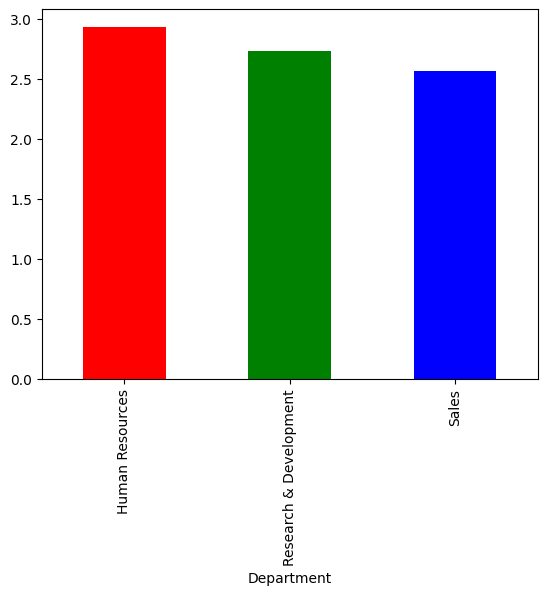

In [29]:
grp_mean = hr_df.groupby("Department").agg('NumCompaniesWorked').mean()
grp_mean

#get colors
mean_colors = list("rgb")
grp_mean.plot(kind="bar", color=mean_colors)
plt.show()

In [28]:
grp_mean

,NumCompaniesWorked
Department,
Human Resources,2.936508
Research & Development,2.733611
Sales,2.571749
